In [219]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\train_v9rqX0R.csv")
pd.set_option('display.max_columns', None)
df.shape
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [155]:
df.shape

(8523, 12)

In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
#checking unique value in dataset
df.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [156]:
#checking null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [220]:
#filling missing values
item_weight_mean=df.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [221]:
miss_bool = df['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [222]:
for i, item in enumerate(df['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            df['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            df['Item_Weight'][i] = np.mean(df['Item_Weight'])

<ipython-input-222-7e80e9ec6b13>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Item_Weight'][i] = np.mean(df['Item_Weight'])


In [223]:
df['Item_Weight'].isnull().sum()

0

In [224]:
outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [225]:
def impute_outlet_size(cols):
    Outlet_Size = cols[0]
    Outlet_Type = cols[1]
    
    if pd.isnull(Outlet_Size):

        if Outlet_Type =="Grocery Store":
            return "Small"

        elif Outlet_Type == "Supermarket Type1":
            return "Small"
        elif Outlet_Type =="Supermarket Type2":
            return "Median"

        else:
            return "Median"

    else:
        return Outlet_Size

In [226]:
df['Outlet_Size'] = df[['Outlet_Size','Outlet_Type']].apply(impute_outlet_size,axis=1)


In [164]:
df['Outlet_Size'].isnull().sum()

0

In [165]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [166]:
#it has 0 values,so we are replacing with mean
sum(df['Item_Visibility']==0)

526

In [227]:
df["Item_Visibility"]=df["Item_Visibility"].replace([0],df["Item_Visibility"].mean())

In [168]:
sum(df['Item_Visibility']==0)

0

In [228]:
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [229]:
#creating of new attributes
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [230]:
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [231]:
df['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [232]:
#creating new attributes from new item type for item fat content as non edible
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [233]:
# create small values for establishment year
df['Outlet_Years'] = 2020 - df['Outlet_Establishment_Year']

In [175]:
df['Outlet_Years']

0       21
1       11
2       21
3       22
4       33
        ..
8518    33
8519    18
8520    16
8521    11
8522    23
Name: Outlet_Years, Length: 8523, dtype: int64

In [234]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,21
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,Food,22
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,33


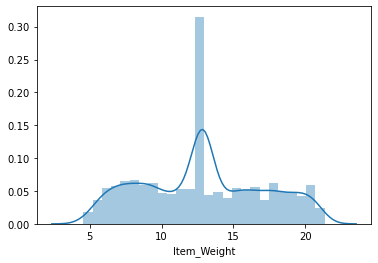

In [92]:
#EDA
sns.distplot(df["Item_Weight"])

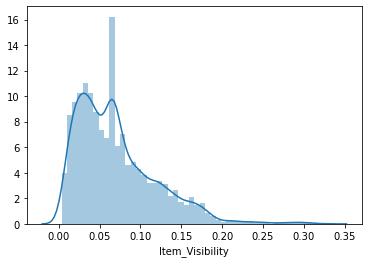

In [53]:
sns.distplot(df["Item_Visibility"])

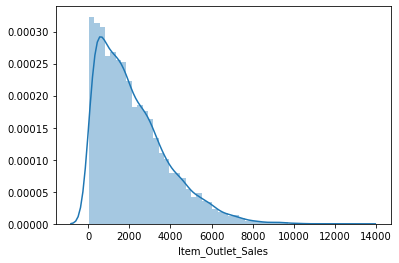

In [54]:
sns.distplot(df["Item_Outlet_Sales"])

In [235]:
#log transformation
df["Item_Outlet_Sales"]=np.log(1+df["Item_Outlet_Sales"])

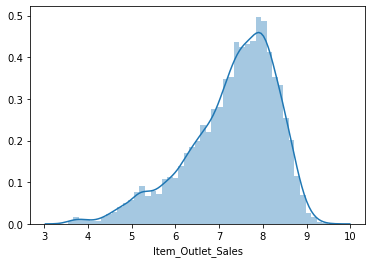

In [94]:
sns.distplot(df["Item_Outlet_Sales"])

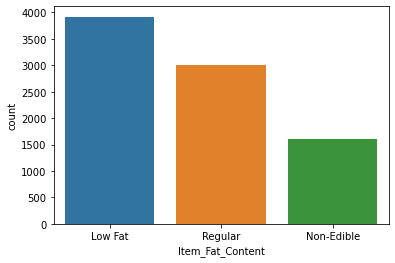

In [64]:
#for catogorical
sns.countplot(df["Item_Fat_Content"])

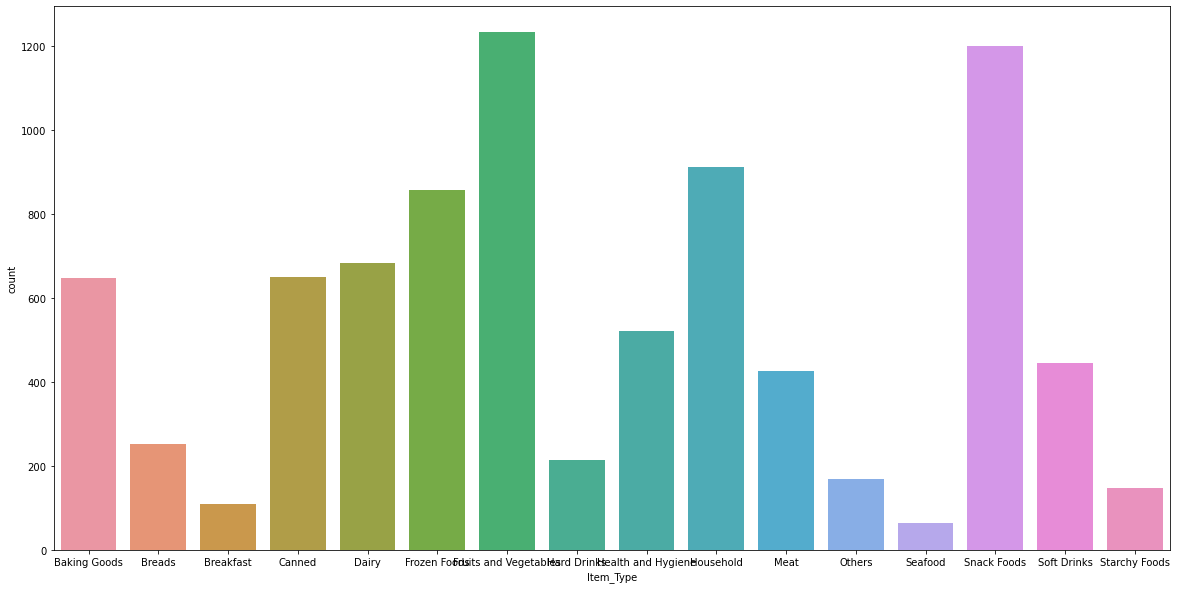

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(df["Item_Type"])

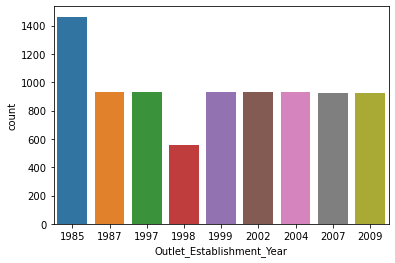

In [67]:
sns.countplot(df["Outlet_Establishment_Year"])

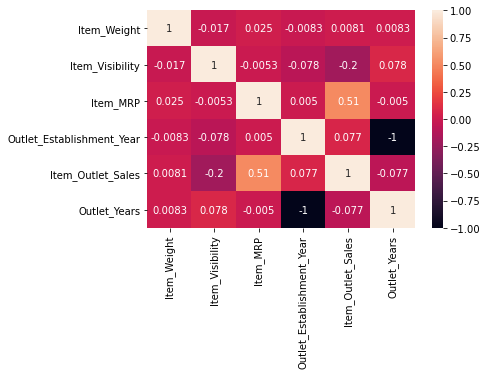

In [95]:
#correlation matrix
corr=df.corr()
sns.heatmap(corr,annot=True,cmap=None)

In [178]:
#checking catogerical attribtes
print(df.select_dtypes(['object']).columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],
      dtype='object')


In [236]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Item_Type"]=le.fit_transform(df["Item_Type"])

In [99]:
#cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
#for col in cat_col:
#    df[col] = le.fit_transform(df[col])

In [237]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])


In [238]:
#one hot encoding
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,8.225808,21,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,6.096776,11,3,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,7.648868,21,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,6,182.0950,OUT010,1998,6.597664,22,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,9,53.8614,OUT013,1987,6.903451,33,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1


In [239]:
df.shape

(8523, 26)

In [240]:
#getting independent and dependend features
X = df.drop(columns=["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])
y = df['Item_Outlet_Sales']

In [185]:
#Model training
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import xgboost

lin_reg=LinearRegression()
cv = cross_val_score(lin_reg,X,y,cv=5, scoring ='neg_mean_squared_error')
print(cv)
print(cv.mean())


[-0.29357577 -0.29849171 -0.28487834 -0.28841778 -0.28022777]
-0.2891182742641596


In [186]:
lin_reg.fit(X,y)
prediction=lin_reg.predict(X)
print('MSE', mean_squared_error(y,prediction))

MSE 0.28800650325017957


In [187]:
cv_score=np.abs(np.mean(cv))
cv_score

0.2891182742641596

In [108]:
model = Ridge(normalize=True)
cv = cross_val_score(model,X,y,cv=5, scoring ="neg_mean_squared_error")
print(cv)
print(cv.mean())

[-0.58662685 -0.57300706 -0.546265   -0.56997336 -0.59367145]
-0.5739087434717963


In [110]:
#extra
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =5)
lin_reg=LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
metrics.mean_squared_error(y_test,y_pred)

0.44396711145494583

In [241]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
regressor=RandomForestRegressor()
cv = cross_val_score(regressor,X,y,cv=5, scoring ="neg_mean_squared_error")
print(cv)
print(cv.mean())

[-0.31621884 -0.31597896 -0.29976165 -0.31299344 -0.30114825]
-0.3092202285106068


In [242]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [243]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =5)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error',
            n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [244]:
predictions=rf_random.predict(X_test)

In [245]:
#FOR TEST DATA
test_data=pd.read_csv(r"C:\Users\ADMIN\Downloads\test_AbJTz2l.csv")
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [112]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [246]:
#filling missing values
item_weight_mean=test_data.pivot_table(values = "Item_Weight", index = 'Item_Identifier')
item_weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [247]:
miss_bool = test_data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4        True
        ...  
5676    False
5677    False
5678    False
5679    False
5680    False
Name: Item_Weight, Length: 5681, dtype: bool

In [248]:
for i, item in enumerate(test_data['Item_Identifier']):
    if miss_bool[i]:
        if item in item_weight_mean:
            test_data['Item_Weight'][i] = item_weight_mean.loc[item]['Item_Weight']
        else:
            test_data['Item_Weight'][i] = np.mean(test_data['Item_Weight'])

<ipython-input-248-3986d2d54fe7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Item_Weight'][i] = np.mean(test_data['Item_Weight'])


In [249]:
test_data['Item_Weight'].isnull().sum()

0

In [250]:
outlet_size_mode = test_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [251]:
def impute_outlet_size(cols):
    Outlet_Size = cols[0]
    Outlet_Type = cols[1]
    
    if pd.isnull(Outlet_Size):

        if Outlet_Type =="Grocery Store":
            return "Small"

        elif Outlet_Type == "Supermarket Type1":
            return "Small"
        elif Outlet_Type =="Supermarket Type2":
            return "Median"

        else:
            return "Median"

    else:
        return Outlet_Size

In [252]:
test_data['Outlet_Size'] = test_data[['Outlet_Size','Outlet_Type']].apply(impute_outlet_size,axis=1)


In [253]:
test_data['Outlet_Size'].isnull().sum()

0

In [254]:
#it has 0 values,so we are replacing with mean
sum(test_data['Item_Visibility']==0)

353

In [255]:
test_data["Item_Visibility"]=test_data["Item_Visibility"].replace([0],test_data["Item_Visibility"].mean())

In [199]:
sum(test_data['Item_Visibility']==0)

0

In [256]:
# combine item fat content
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
test_data['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [257]:
#creating of new attributes
test_data['New_Item_Type'] = test_data['Item_Identifier'].apply(lambda x: x[:2])
test_data['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [258]:
test_data['New_Item_Type'] = test_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [259]:
test_data['New_Item_Type'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: New_Item_Type, dtype: int64

In [260]:
#creating new attributes from new item type for item fat content as non edible
test_data.loc[test_data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
test_data['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

In [261]:
# create small values for establishment year
test_data['Outlet_Years'] = 2020 - test_data['Outlet_Establishment_Year']

In [130]:
test_data['Outlet_Years']

0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Years, Length: 5681, dtype: int64

In [262]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data["Outlet"]=le.fit_transform(test_data["Outlet_Identifier"])

In [133]:
#checking catogerical attribtes
print(test_data.select_dtypes(['object']).columns)

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'],
      dtype='object')


In [134]:
#label encoding
#cat_colss=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
#       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
#for column in cat_colss:
#    test_data[column]=le.fit_transform(test_data[column])


In [263]:
test_data["Item_Type"]=le.fit_transform(test_data["Item_Type"])

In [264]:
#one hot encoding
test_data = pd.get_dummies(test_data, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
test_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,FDW58,20.750000,0.007565,13,107.8622,OUT049,1999,21,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.038428,4,87.3198,OUT017,2007,13,2,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.099575,11,241.7538,OUT010,1998,22,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.015388,13,155.0340,OUT017,2007,13,2,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.695633,0.118599,4,234.2300,OUT027,1985,35,5,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0


In [265]:
test_data.shape

(5681, 25)

In [266]:
test_data = test_data.drop(columns=["Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier"])


In [267]:
test_data

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Years,Outlet,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_Drinks,New_Item_Type_Food,New_Item_Type_Non-Consumable
0,20.750000,0.007565,13,107.8622,21,9,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
1,8.300000,0.038428,4,87.3198,13,2,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,11,241.7538,22,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,7.315000,0.015388,13,155.0340,13,2,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,12.695633,0.118599,4,234.2300,35,5,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,13,141.3154,23,8,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0
5677,7.600000,0.142991,15,169.1448,11,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
5678,10.000000,0.073529,8,118.7440,18,7,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1
5679,15.300000,0.065684,3,214.6218,13,2,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0


In [268]:
final_predection=rf_random.predict(test_data)

In [269]:
final_predection

array([7.19914592, 7.09941966, 6.24593438, ..., 7.35905277, 8.10962261,
       7.10947651])

In [270]:
sumbmission=pd.read_csv(r"C:\Users\ADMIN\Downloads\sample_submission_8RXa3c6.csv")
sumbmission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


In [271]:
sumbmission = sumbmission[['Item_Identifier','Outlet_Identifier']]
sumbmission['Item_Outlet_Sales'] = final_predection
sumbmission.head(8)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7.199146
1,FDW14,OUT017,7.099420
2,NCN55,OUT010,6.245934
3,FDQ58,OUT017,7.706608
4,FDY38,OUT027,8.669047
5,FDH56,OUT046,7.384145
6,FDL48,OUT018,6.462879
7,FDC48,OUT027,7.696918


In [272]:
sumbmission.to_csv("sumbit233", index=False)